In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('data/TG_STAID002759.txt', skiprows=19, delimiter=',')

In [40]:
df.rename(columns = {' SOUID':'SOUID', '    DATE':'DATE','   TG':'TG',' Q_TG':'Q_TG'}, inplace = True)

In [41]:
df.columns

Index(['SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [42]:
df["DATE"]=pd.to_datetime(df["DATE"].astype(str))

In [43]:
df.set_index(['DATE'], inplace=True)

In [44]:
df.head()

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0


In [45]:
df_F=df.copy()

In [46]:
df_F["MONTH"]= df_F.index.month

In [47]:
df_F.loc[(df_F["Q_TG"] == 1) | (df_F["Q_TG"] == 9)]

,SOUID,TG,Q_TG,MONTH
DATE,,,,
1945-04-25,127488,-9999,9,4
1945-04-26,127488,-9999,9,4
1945-04-27,127488,-9999,9,4
1945-04-28,127488,-9999,9,4
1945-04-29,127488,-9999,9,4
...,...,...,...,...
1945-11-03,127488,-9999,9,11
1945-11-04,127488,-9999,9,11
1945-11-05,127488,-9999,9,11


- TG   : mean temperature in 0.1

In [48]:
df_F.loc[df_F['Q_TG'] == 0, 'TG'] = df_F.loc[df_F['Q_TG'] == 0, 'TG']*0.1

In [49]:
df_F.head()

,SOUID,TG,Q_TG,MONTH
DATE,,,,
1876-01-01,127488,2.2,0,1
1876-01-02,127488,2.5,0,1
1876-01-03,127488,0.3,0,1
1876-01-04,127488,-5.8,0,1
1876-01-05,127488,-9.8,0,1


In [50]:
df_F.loc[(df_F["Q_TG"] == 1) | (df_F["Q_TG"] == 9)]

,SOUID,TG,Q_TG,MONTH
DATE,,,,
1945-04-25,127488,-9999.0,9,4
1945-04-26,127488,-9999.0,9,4
1945-04-27,127488,-9999.0,9,4
1945-04-28,127488,-9999.0,9,4
1945-04-29,127488,-9999.0,9,4
...,...,...,...,...
1945-11-03,127488,-9999.0,9,11
1945-11-04,127488,-9999.0,9,11
1945-11-05,127488,-9999.0,9,11


In [51]:
indexList=df_F.loc[(df_F["Q_TG"] == 1) | (df_F["Q_TG"] == 9)].index
indexList[0]



Timestamp('1945-04-25 00:00:00')

In [52]:
type(indexList[0])

pandas._libs.tslibs.timestamps.Timestamp

- Filling missing Values

In [53]:
df_F.loc["1945-04-25":"1945-11-05","TG"]=df_F.loc["1944-04-25":"1944-11-05","TG"].values
df_F.loc["1947-01-21","TG"]=df_F.loc["1946-01-21","TG"]
df_F.loc["2022-03-31","TG"]=df_F.loc["2021-03-31","TG"]

In [54]:
df_F.loc[(df_F["Q_TG"] == 1) | (df_F["Q_TG"] == 9)]

,SOUID,TG,Q_TG,MONTH
DATE,,,,
1945-04-25,127488,9.2,9,4
1945-04-26,127488,9.2,9,4
1945-04-27,127488,8.8,9,4
1945-04-28,127488,8.6,9,4
1945-04-29,127488,6.8,9,4
...,...,...,...,...
1945-11-03,127488,5.5,9,11
1945-11-04,127488,7.2,9,11
1945-11-05,127488,9.7,9,11


In [37]:
df_F.to_csv("data/TG_clean.csv")

# General Overview

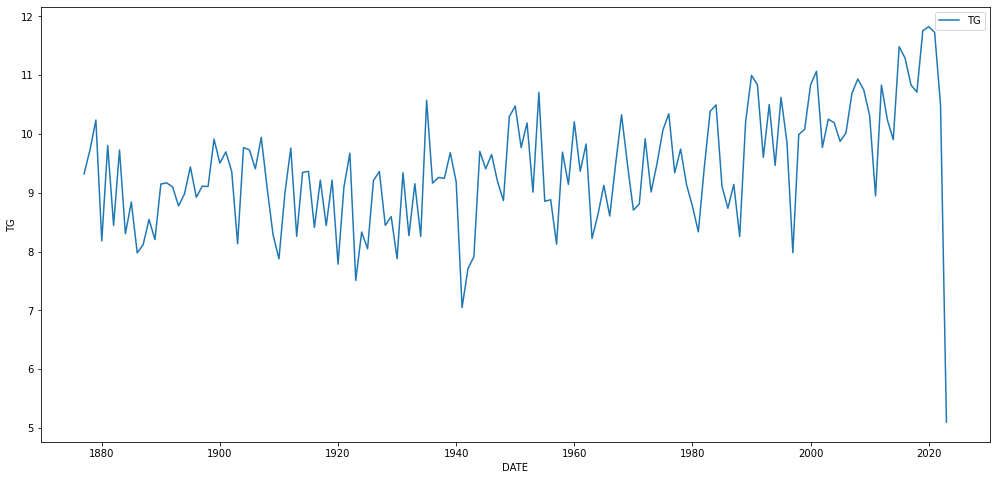

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df_F.resample('Y').mean().index, y = 'TG',data = df_F.resample('Y').mean() , label="TG")
plt.legend(loc='upper right')

# Step 3 - Model the trend

Any ideas on how to do that?

- Linear Regression to model the slop; what should/could our X of the Linear Regression be in that case?

In [19]:
# Create a yearly column for the trend
df_F['YEAR'] = df_F.index.year
df_F.head()

,SOUID,TG,Q_TG,MONTH,YEAR
DATE,,,,,
1876-01-01,127488,2.2,0,1,1876
1876-01-02,127488,2.5,0,1,1876
1876-01-03,127488,0.3,0,1,1876
1876-01-04,127488,-5.8,0,1,1876
1876-01-05,127488,-9.8,0,1,1876


In [20]:
# Create a timestep variable
df_F['TIMESTEP'] = list(range(len(df_F)))
df_F.head()

,SOUID,TG,Q_TG,MONTH,YEAR,TIMESTEP
DATE,,,,,,
1876-01-01,127488,2.2,0,1,1876,0
1876-01-02,127488,2.5,0,1,1876,1
1876-01-03,127488,0.3,0,1,1876,2
1876-01-04,127488,-5.8,0,1,1876,3
1876-01-05,127488,-9.8,0,1,1876,4


In [21]:
# Run a Linear Regression
from sklearn.linear_model import LinearRegression
m = LinearRegression()
X = df_F[['TIMESTEP']]
y = df_F['TG']
m.fit(X, y)

LinearRegression()

# Step 4 - Plot the trend and the original data

In [22]:
# Use the model to make a prediction
df_F['trend'] = m.predict(X)
df_F.head()

,SOUID,TG,Q_TG,MONTH,YEAR,TIMESTEP,trend
DATE,,,,,,,
1876-01-01,127488,2.2,0,1,1876,0,8.541585
1876-01-02,127488,2.5,0,1,1876,1,8.541618
1876-01-03,127488,0.3,0,1,1876,2,8.541650
1876-01-04,127488,-5.8,0,1,1876,3,8.541683
1876-01-05,127488,-9.8,0,1,1876,4,8.541715


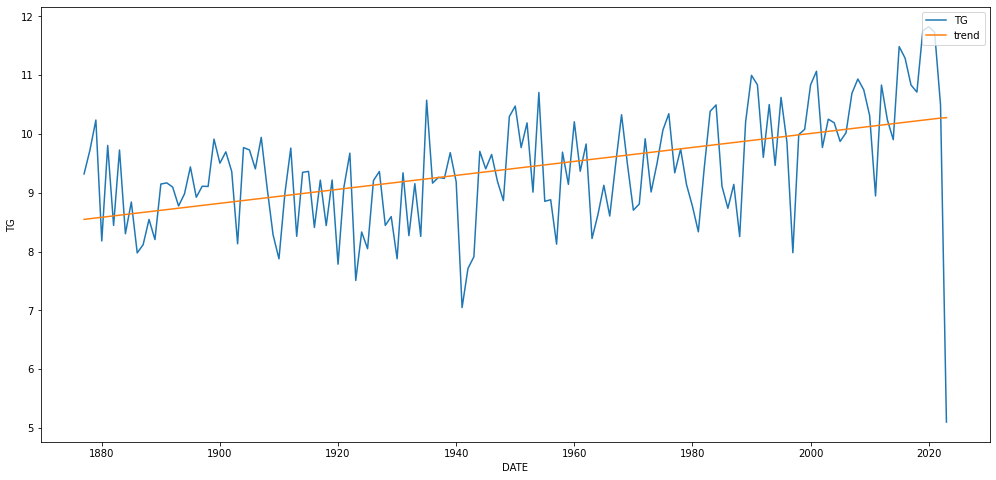

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df_F.resample('Y').mean().index, y = 'TG',data = df_F.resample('Y').mean() , label="TG")
sns.lineplot(x = df_F.resample('Y').mean().index, y = 'trend',data = df_F.resample('Y').mean() , label="trend")

plt.legend(loc='upper right')

# Step 5 - Model the seasonality

In [24]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df_F.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(df_F.index)
df_F = df_F.join(seasonal_dummies)

In [25]:
df_F.head()

,SOUID,TG,Q_TG,MONTH,YEAR,TIMESTEP,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,,,,,
1876-01-01,127488,2.2,0,1,1876,0,8.541585,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,127488,2.5,0,1,1876,1,8.541618,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,127488,0.3,0,1,1876,2,8.541650,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,127488,-5.8,0,1,1876,3,8.541683,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,127488,-9.8,0,1,1876,4,8.541715,0,0,0,0,0,0,0,0,0,0,0


In [26]:
y=df_F["TG"]
y.head()

DATE
1876-01-01    2.2
1876-01-02    2.5
1876-01-03    0.3
1876-01-04   -5.8
1876-01-05   -9.8
Name: TG, dtype: float64

In [27]:
# Define X and y
X = df_F.drop(columns=['SOUID', 'TG', 'Q_TG', 'MONTH',"YEAR", "trend"])

In [28]:
X.head()

,TIMESTEP,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1876-01-01,0,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,2,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,3,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,4,0,0,0,0,0,0,0,0,0,0,0


In [29]:
m = LinearRegression()

In [30]:
m.fit(X, y)

LinearRegression()

In [31]:
# Create a model with trend and seasonality
df_F['trend_seasonal'] = m.predict(X)
df_F.head()

,SOUID,TG,Q_TG,MONTH,YEAR,TIMESTEP,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,,,,,
1876-01-01,127488,2.2,0,1,1876,0,8.541585,0,0,0,0,0,0,0,0,0,0,0,-0.869966
1876-01-02,127488,2.5,0,1,1876,1,8.541618,0,0,0,0,0,0,0,0,0,0,0,-0.869933
1876-01-03,127488,0.3,0,1,1876,2,8.541650,0,0,0,0,0,0,0,0,0,0,0,-0.869899
1876-01-04,127488,-5.8,0,1,1876,3,8.541683,0,0,0,0,0,0,0,0,0,0,0,-0.869866
1876-01-05,127488,-9.8,0,1,1876,4,8.541715,0,0,0,0,0,0,0,0,0,0,0,-0.869833


# Step 6 - Plot the original data and the trend

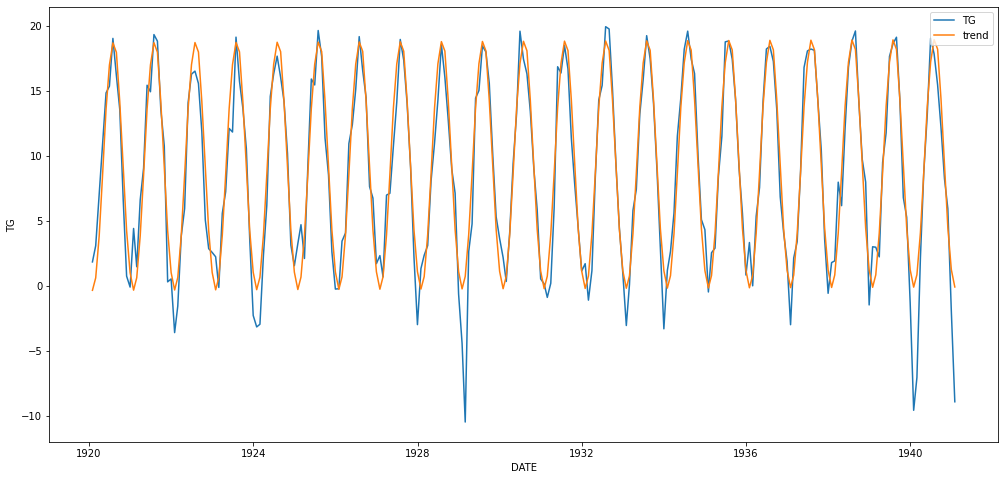

In [32]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df_F.loc["1920-01-01":"1941-01-01"].resample('M').mean().index, y = 'TG',data = df_F.loc["1920-01-01":"1941-01-01"].resample('M').mean() , label="TG")
sns.lineplot(x = df_F.loc["1920-01-01":"1941-01-01"].resample('M').mean().index, y = 'trend_seasonal',data = df_F.loc["1920-01-01":"1941-01-01"].resample('M').mean() , label="trend")

plt.legend(loc='upper right')

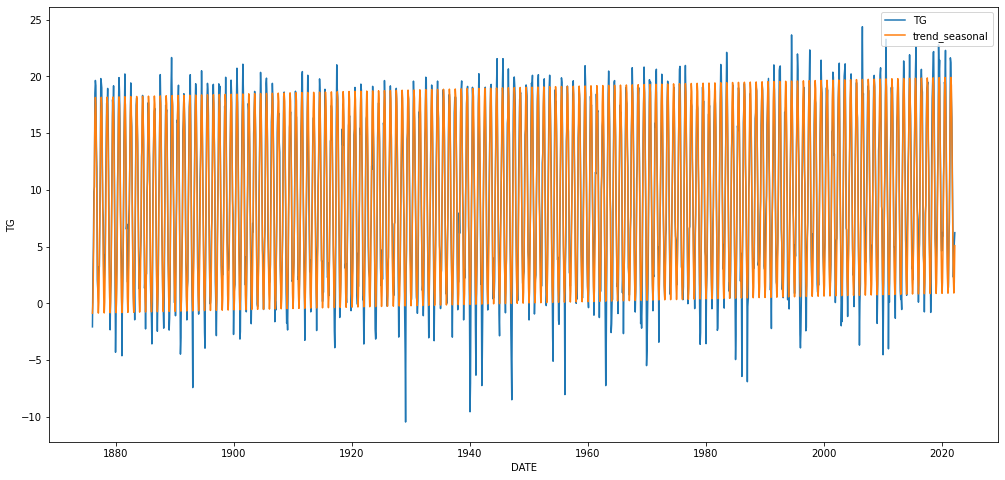

In [33]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df_F.resample('M').mean().index, y = 'TG',data = df_F.resample('M').mean() , label="TG")
sns.lineplot(x = df_F.resample('M').mean().index, y = 'trend_seasonal',data = df_F.resample('M').mean() , label="trend_seasonal")

plt.legend(loc='upper right')

# Step 7 - Extract the remainder

In [34]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
df_F['remainder'] = df_F['TG'] - df_F['trend_seasonal']

<AxesSubplot:xlabel='DATE', ylabel='remainder'>

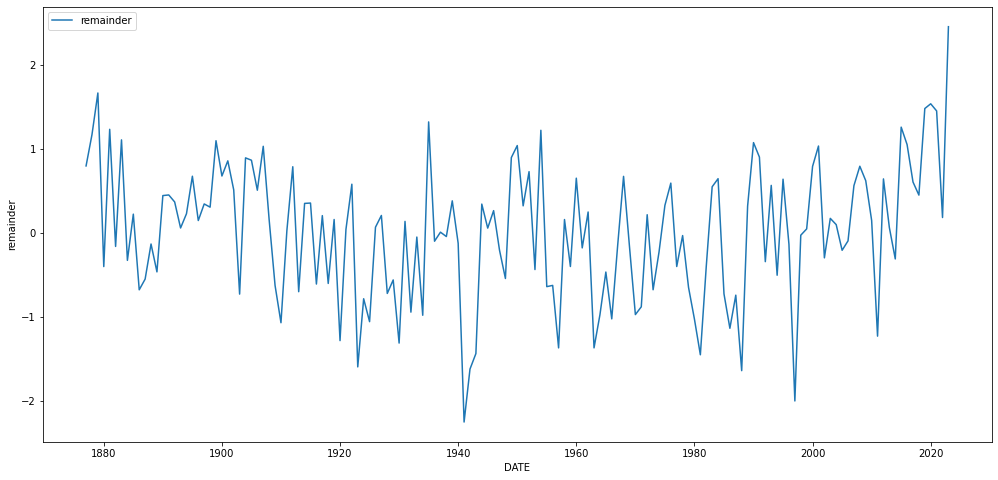

In [35]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df_F.resample('Y').mean().index, y = 'remainder',data = df_F.resample('Y').mean() , label="remainder")

# Step 8 - Save the remainder

In [36]:
df_F['remainder'].to_csv('data/TG_remainder.csv')